In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [16]:
# Load the dataset
df = pd.read_csv("../train.csv")
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [17]:
# Split the values in the Type_of_Loan column and remove leading/trailing spaces
df['Type_of_Loan'] = df['Type_of_Loan'].str.split(',').apply(lambda x: [t.strip() for t in x])

# Initialize an empty list to store rows
new_data = []

# Iterate over each row in the original DataFrame
for index, row in df.iterrows():
    # For each loan type in the row, create a new row with the same values for other columns
    for loan_type in row['Type_of_Loan']:
        if loan_type.startswith('and '):
            loan_type = loan_type[4:]  # Remove 'and ' from the beginning
        new_row = row.copy()  # Copy values from other columns
        new_row['Type_of_Loan'] = loan_type.strip()  # Add the loan type
        new_data.append(new_row)

# Create a new DataFrame from the list of rows
df = pd.DataFrame(new_data)

In [23]:
copy = df.copy()

In [24]:
df.shape

(364696, 23)

In [25]:
# Drop irrelevant columns
print(df.shape)
df = df.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], axis=1)
print(df.shape)
df

(364696, 23)


KeyError: "['ID', 'Customer_ID', 'Month', 'Name', 'SSN'] not found in axis"

In [20]:
# Check for messing data
def detect_missing_data(df):
    missing_data = {}  # Dictionary to store missing data information
    for column in df.columns:
        missing_count = df[column].isnull().sum()  # Count missing values in the column
        if missing_count > 0:
            missing_data[column] = missing_count  # Store column name and missing count
    return missing_data

# Example usage:
missing_data_info = detect_missing_data(df)
print("Columns with missing data:")
for column, count in missing_data_info.items():
    print(f"{column}: {count} missing values")

Columns with missing data:


In [21]:
# Handle missing values (if any)
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(364696, 23)
(364696, 23)


In [27]:
# Encode categorical variables (Label Encoding for simplicity)
label_encoders = {}
encoded_values = {}

categorical_columns = [
    'Occupation', 
    'Type_of_Loan',
    'Credit_Mix',
    'Payment_Behaviour',
    'Payment_of_Min_Amount',
    'Credit_Score', 
]
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
    encoded_values[column] = dict(zip(label_encoders[column].classes_, label_encoders[column].transform(label_encoders[column].classes_)))

In [28]:
df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,0,3.0,...,1,809.98,26.822620,265.0,1,49.574949,21.465380,2,312.494089,0
0,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,1,3.0,...,1,809.98,26.822620,265.0,1,49.574949,21.465380,2,312.494089,0
0,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,8,3.0,...,1,809.98,26.822620,265.0,1,49.574949,21.465380,2,312.494089,0
0,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,3.0,...,1,809.98,26.822620,265.0,1,49.574949,21.465380,2,312.494089,0
1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,0,3.0,...,1,809.98,31.944960,266.0,1,49.574949,21.465380,3,284.629162,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,9,27.0,...,1,502.38,41.255522,380.0,1,35.104023,24.028477,0,516.809083,1
99998,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,0,20.0,...,1,502.38,33.638208,381.0,1,35.104023,24.028477,3,319.164979,2
99998,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,9,20.0,...,1,502.38,33.638208,381.0,1,35.104023,24.028477,3,319.164979,2
99999,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,0,18.0,...,1,502.38,34.192463,382.0,1,35.104023,24.028477,1,393.673696,1


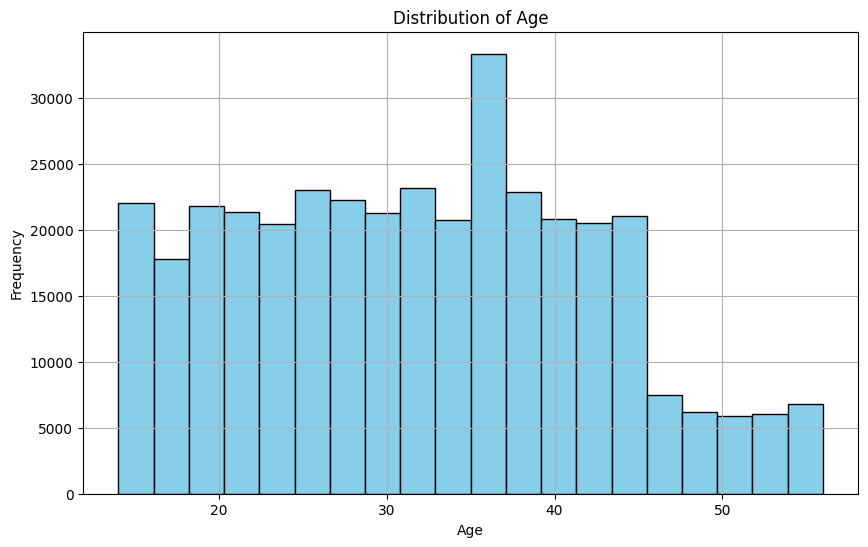

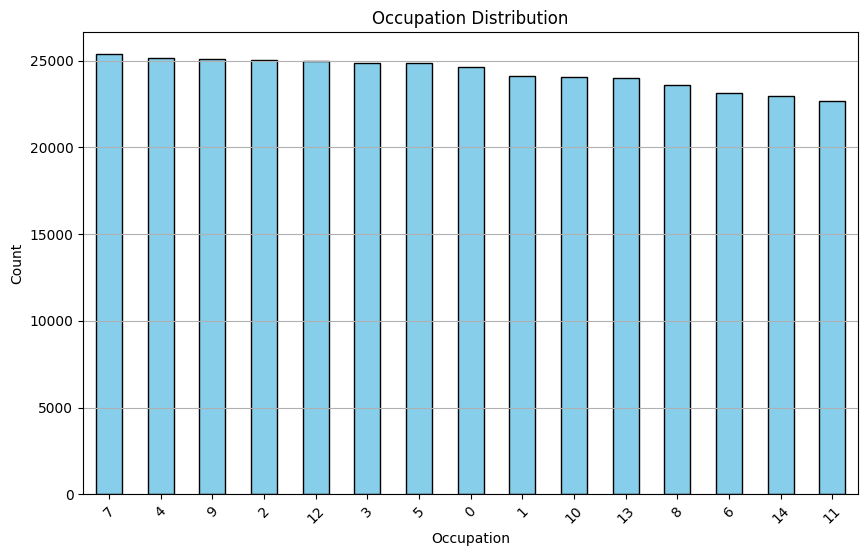

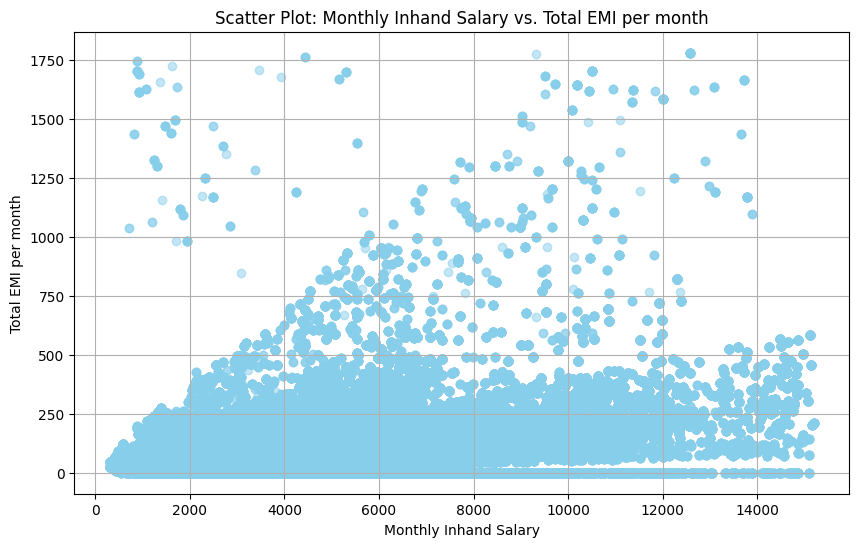

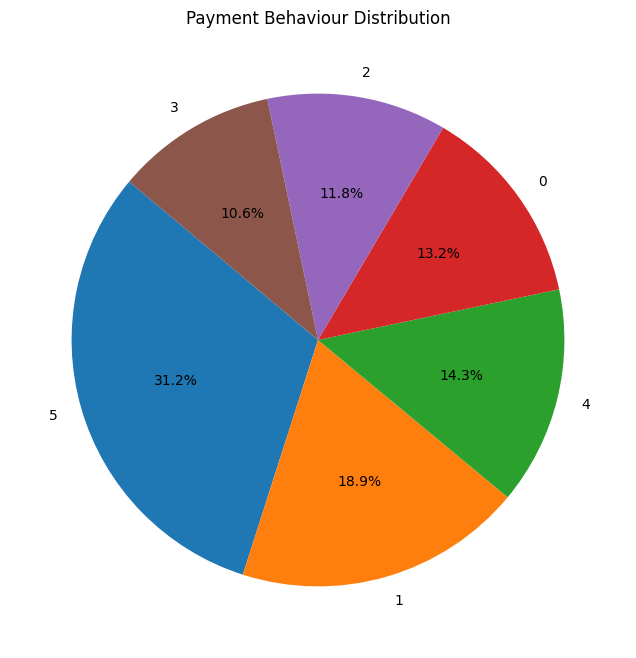

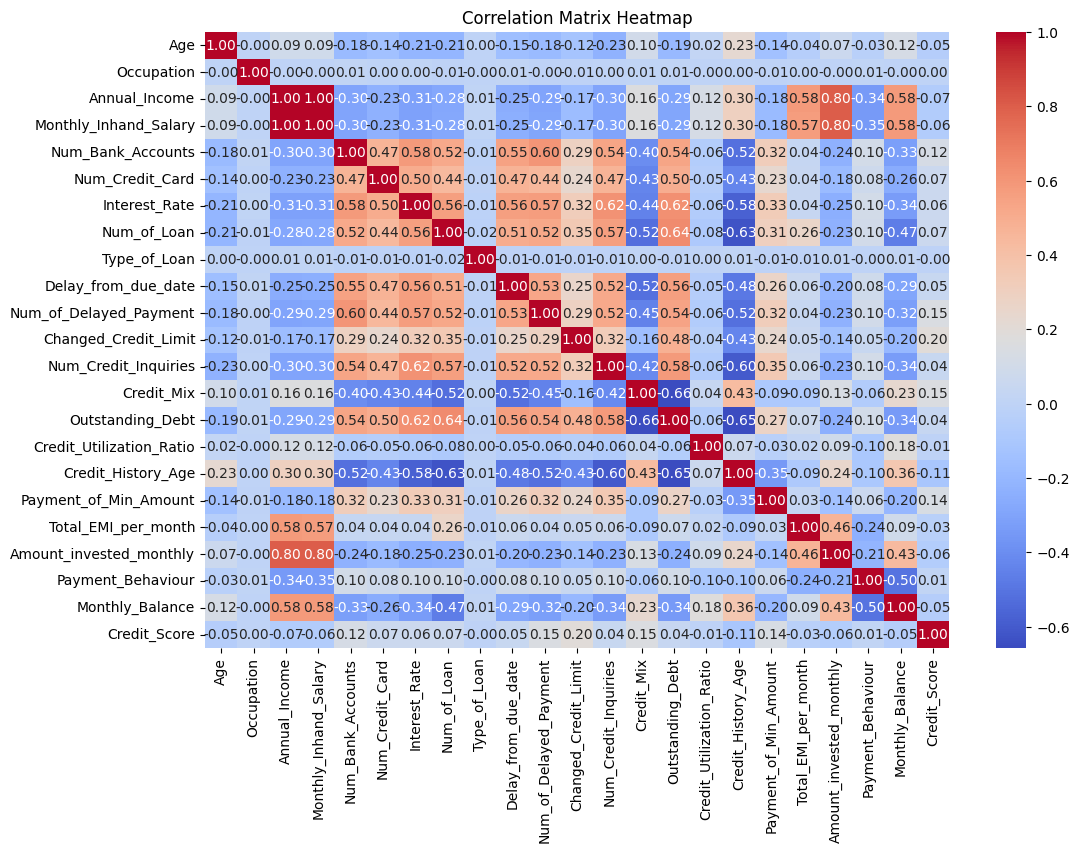

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Age
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(True)
plt.show()

# Bar chart of Occupation
plt.figure(figsize=(10, 6))
occupation_counts = df['Occupation'].value_counts()
occupation_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Distribution')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Scatter plot of Monthly Inhand Salary vs. Total EMI per month
plt.figure(figsize=(10, 6))
plt.scatter(df['Monthly_Inhand_Salary'], df['Total_EMI_per_month'], color='skyblue', alpha=0.5)
plt.xlabel('Monthly Inhand Salary')
plt.ylabel('Total EMI per month')
plt.title('Scatter Plot: Monthly Inhand Salary vs. Total EMI per month')
plt.grid(True)
plt.show()

# Pie chart of Payment Behaviour
plt.figure(figsize=(8, 8))
payment_behaviour_counts = df['Payment_Behaviour'].value_counts()
plt.pie(payment_behaviour_counts, labels=payment_behaviour_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Payment Behaviour Distribution')
plt.show()

# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

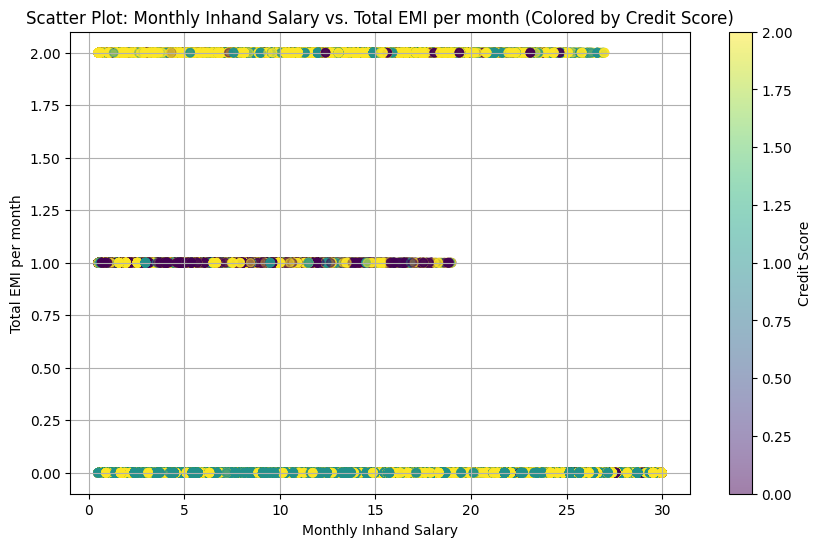

In [33]:
# Scatter plot of Monthly Inhand Salary vs. Total EMI per month colored by Credit Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Changed_Credit_Limit'], df['Credit_Mix'], c=df['Credit_Score'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Credit Score')
plt.xlabel('Monthly Inhand Salary')
plt.ylabel('Total EMI per month')
plt.title('Scatter Plot: Monthly Inhand Salary vs. Total EMI per month (Colored by Credit Score)')
plt.grid(True)
plt.show()

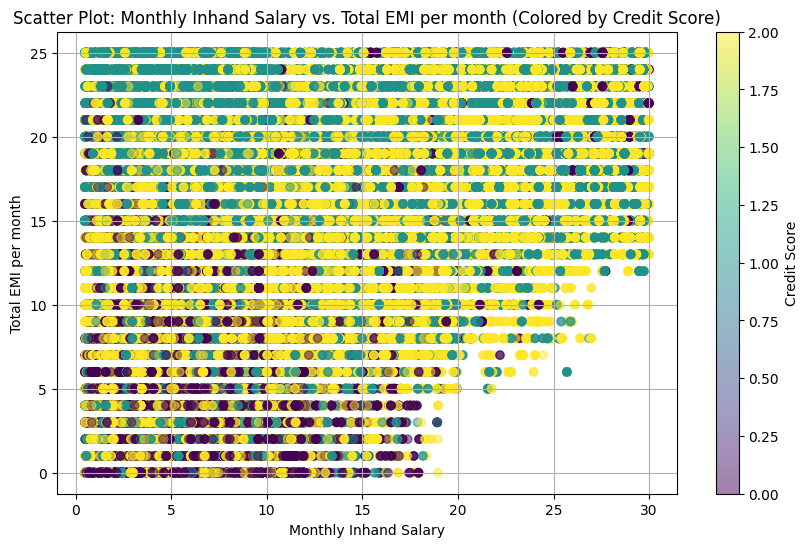

In [34]:
# Scatter plot of Monthly Inhand Salary vs. Total EMI per month colored by Credit Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Changed_Credit_Limit'], df['Num_of_Delayed_Payment'], c=df['Credit_Score'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Credit Score')
plt.xlabel('Monthly Inhand Salary')
plt.ylabel('Total EMI per month')
plt.title('Scatter Plot: Monthly Inhand Salary vs. Total EMI per month (Colored by Credit Score)')
plt.grid(True)
plt.show()

In [29]:
df.to_csv("../train-v2.csv")

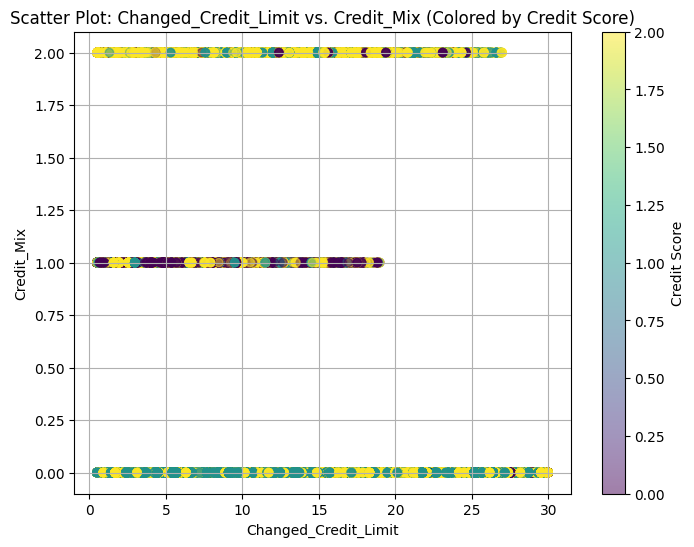

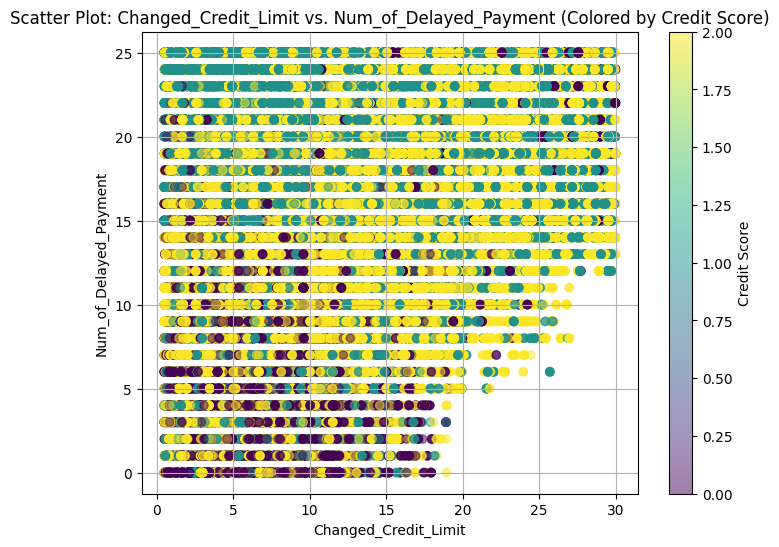

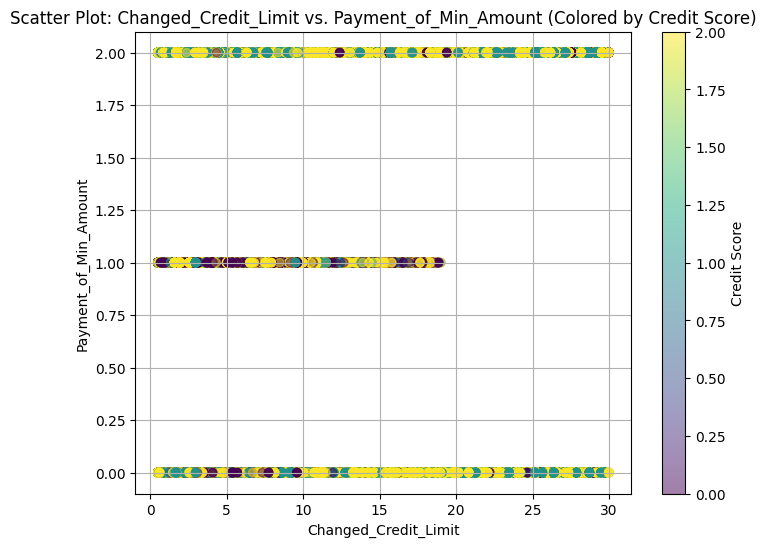

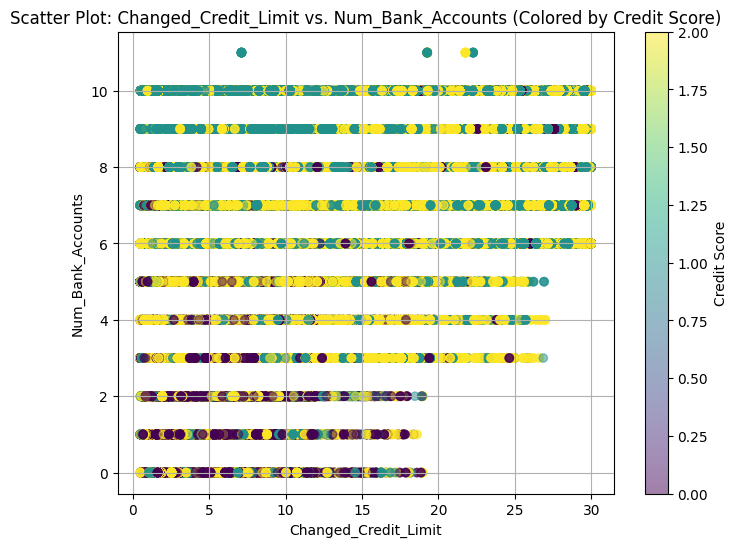

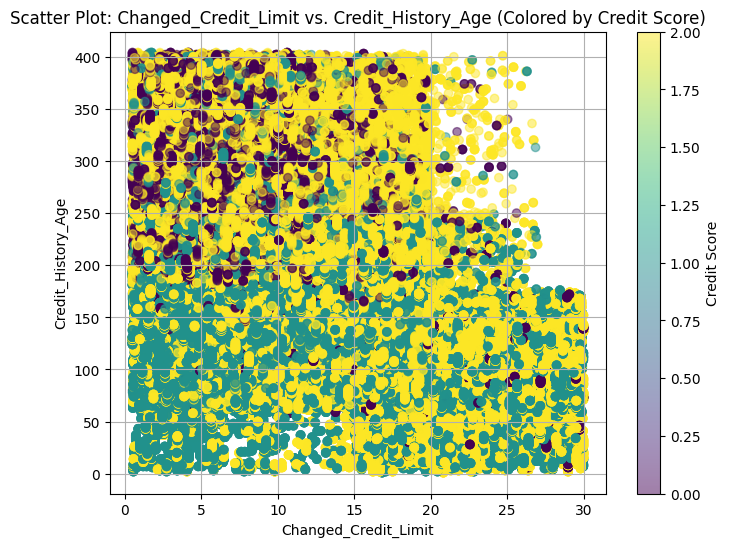

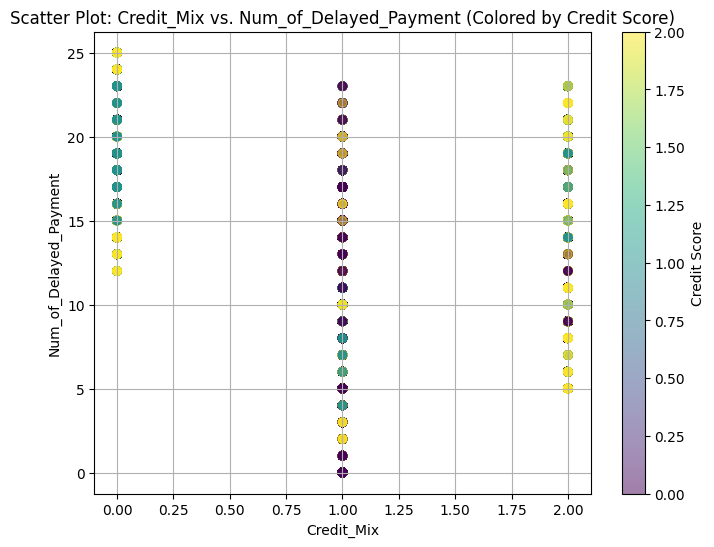

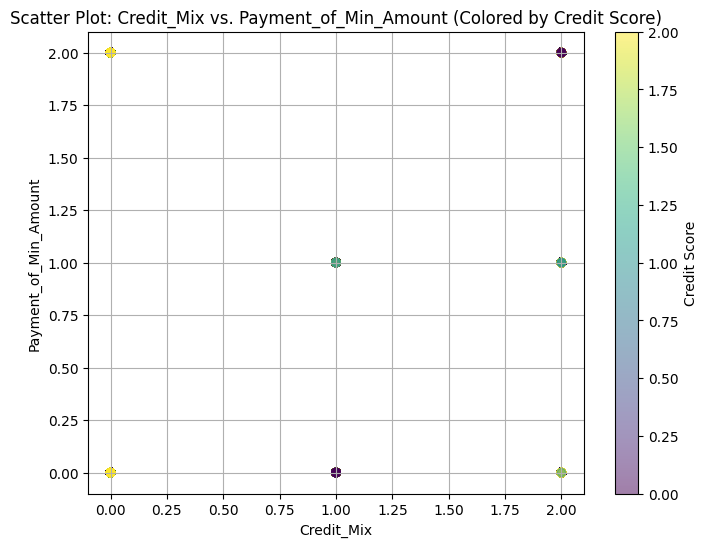

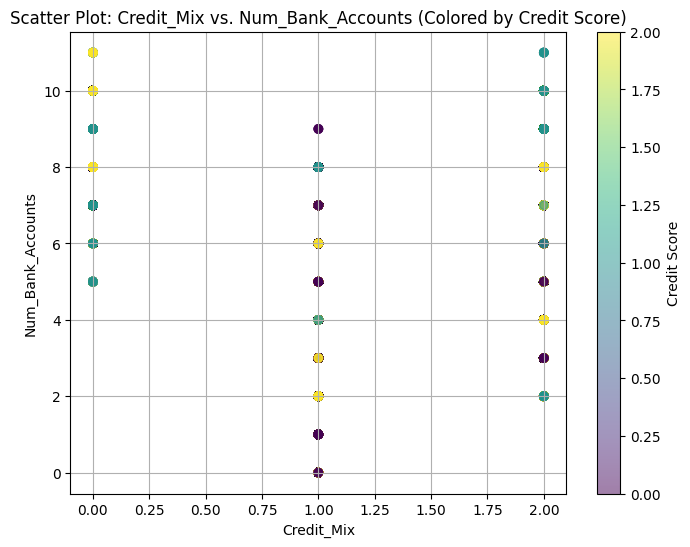

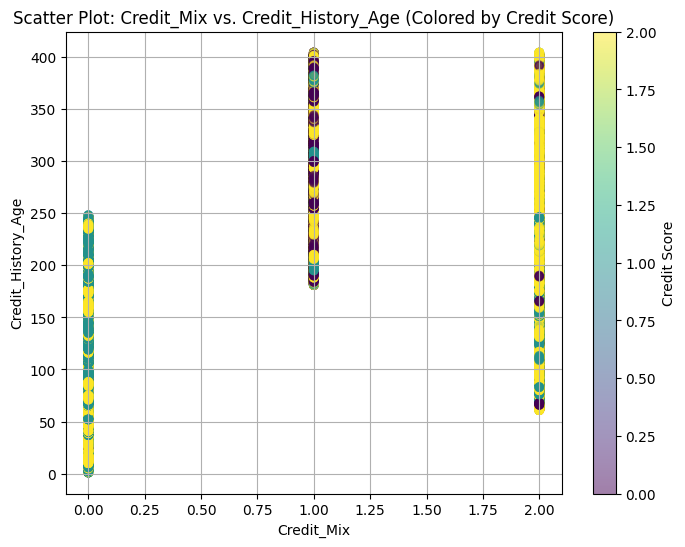

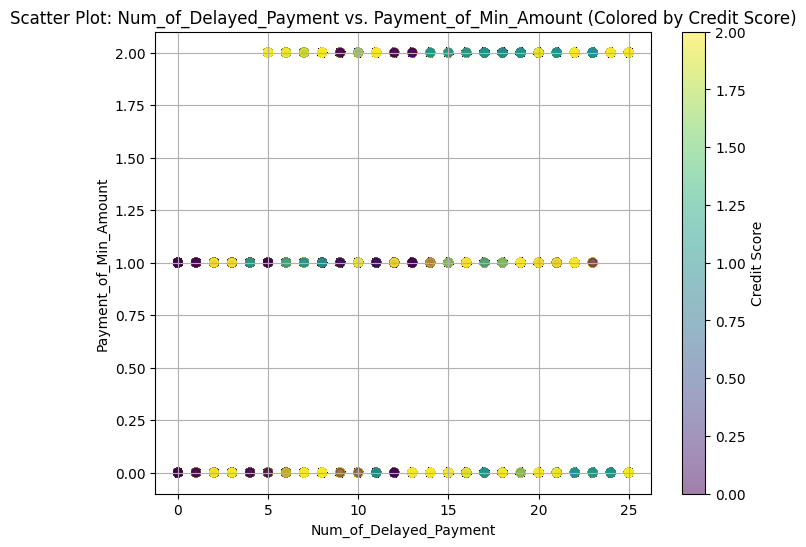

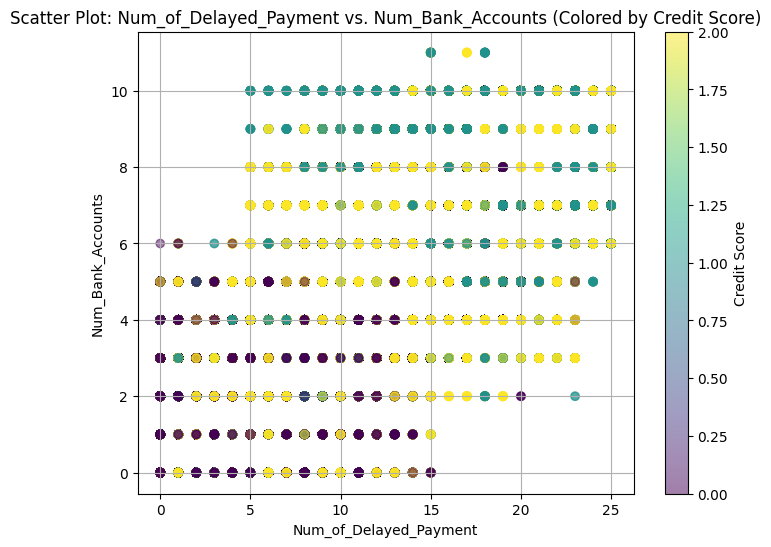

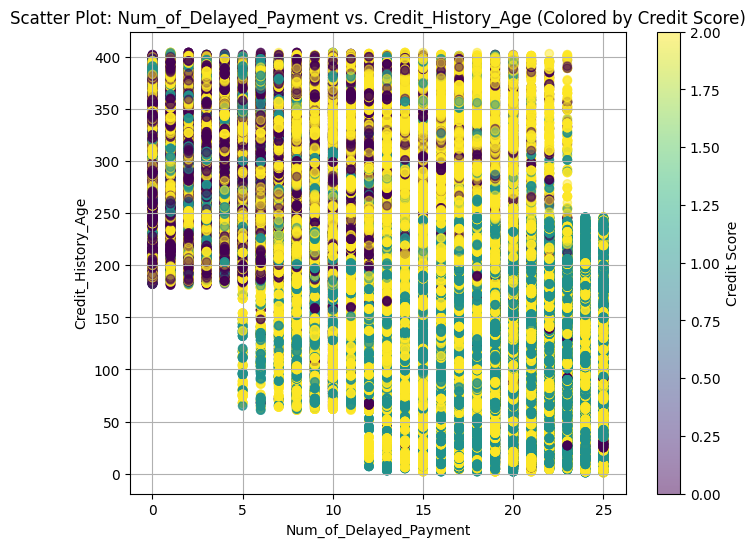

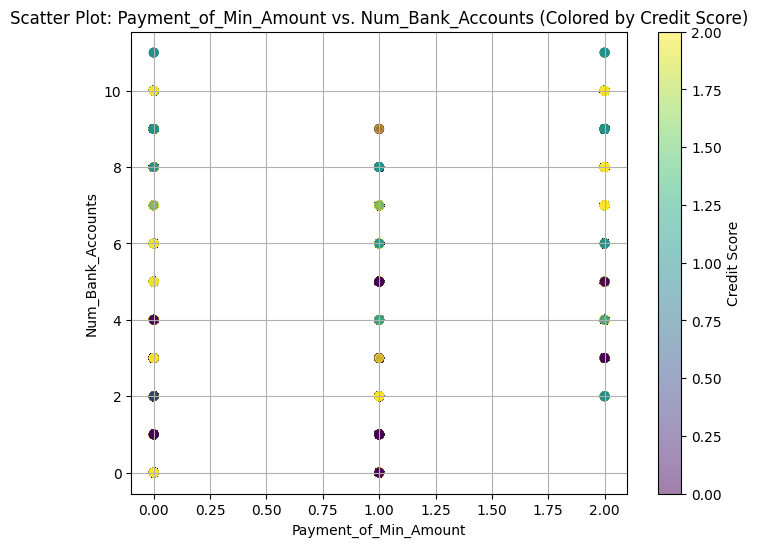

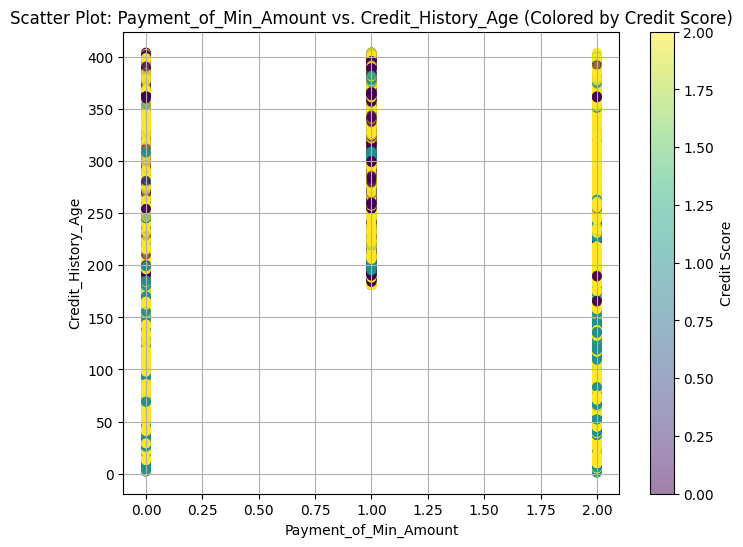

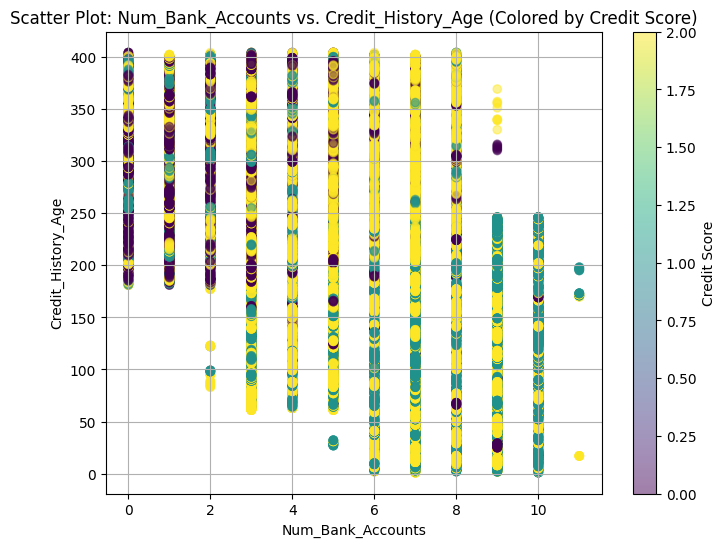

In [36]:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Specify the features to visualize
    features = ['Changed_Credit_Limit', 'Credit_Mix', 'Num_of_Delayed_Payment', 'Payment_of_Min_Amount', 
                'Num_Bank_Accounts', 'Credit_History_Age']

    # Create scatter plots for each pair of features
    for i, feature1 in enumerate(features):
        for j, feature2 in enumerate(features):
            if i < j:  # To avoid duplicate pairs and plots along the diagonal
                plt.figure(figsize=(8, 6))
                plt.scatter(df[feature1], df[feature2], c=df['Credit_Score'], cmap='viridis', alpha=0.5)
                plt.colorbar(label='Credit Score')
                plt.xlabel(feature1)
                plt.ylabel(feature2)
                plt.title(f'Scatter Plot: {feature1} vs. {feature2} (Colored by Credit Score)')
                plt.grid(True)
                plt.show()
